<a href="https://colab.research.google.com/github/aroomak/MarketAnalytics/blob/main/Churn_Prediction_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction
Churn can be considered one of the most important applications of data science in the commercial sector because it plays a major factor in the overall profits earned by the business.

Churn means when a client terminates a subscription to a service they have been using. Therefore, churn prediction helps to find customers with high risk of leaving.  Churn prediction can be treated as a classification problem.

I have used the Telco Customer Churn dataset which is available on [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

In [2]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline  

Import the data set and EDA

In [3]:
## load the dataset
path_d = '/content/drive/MyDrive/Colab Notebooks/MyProtfolio/datasets/'
df = pd.read_csv(path_d+'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Visulization 

**Churn-Gender**

To see the contribution between customer churn and *gender* 

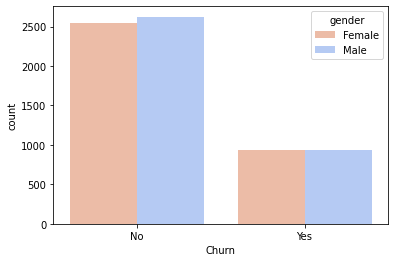

In [ ]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

**Churn-InternetService**

To see the contribution between customer churn and *Internet Service*

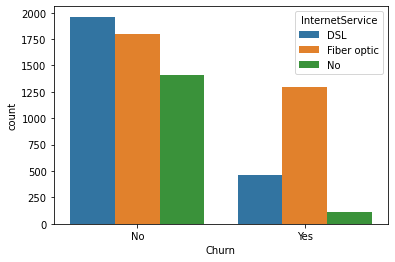

In [ ]:
sns.countplot(x='Churn', data=df, hue='InternetService' )

From the Churn/internetService figure, fiber optic has the highest churned ration among the other two services. 

**Churn-TechSupport**

Check the different states of TechSupport

In [ ]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

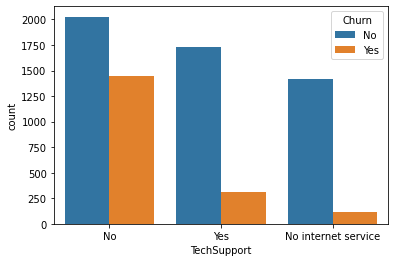

In [ ]:
sns.countplot(x='TechSupport', data=df, hue='Churn')

The services with No TechSupport have the highest churn ration

**Churn-Tenure Length**

First, ranges of available tenures 

In [ ]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

Number of tenures per duration length 

In [ ]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Tenure in Months')]

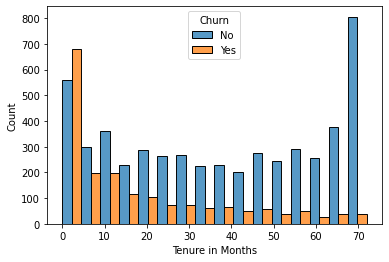

In [ ]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

The highlest churn ration is within the first 5 months and it drops due to longer tenure length. While the lowest cancellation among 36 months tenures.

**Churn-Monthly Charges**



In [ ]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

(array([105.,  45.,  29.,  26.,  30.,  93.,  81.,  70.,  30.,  21., 163.,
        184., 178., 178., 136., 176., 163., 113.,  39.,   9.]),
 array([ 18.85 ,  23.825,  28.8  ,  33.775,  38.75 ,  43.725,  48.7  ,
         53.675,  58.65 ,  63.625,  68.6  ,  73.575,  78.55 ,  83.525,
         88.5  ,  93.475,  98.45 , 103.425, 108.4  , 113.375, 118.35 ]),
 <a list of 20 Patch objects>)

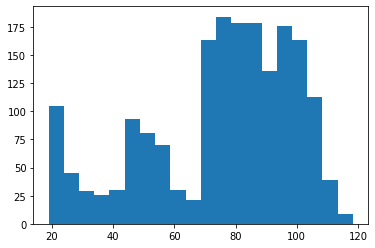

In [ ]:
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=20)

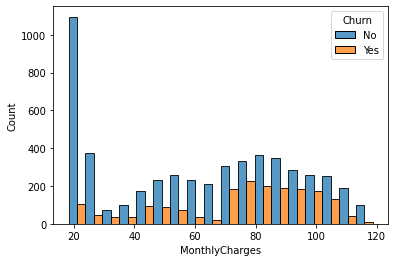

In [ ]:
sns.histplot(x='MonthlyCharges', hue='Churn', data=df, multiple='dodge')

Although there is no clear pattern, but customers with monthly charge of higher than 110 have the least number of service cancellation. 

# Data Preprocessing and Feature Engineering 

We dont need customer ID, drop it

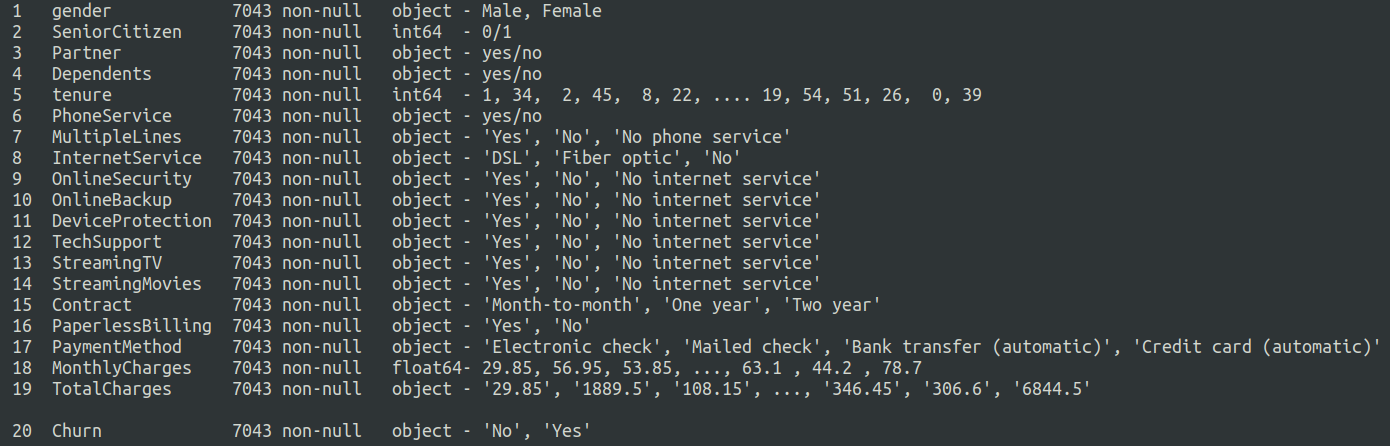

Change Gender column

Female:0 , Male:1 

In [125]:
df2 = pd.DataFrame()
df2['gender'] = df['gender'].apply(lambda x: 1 if x== 'Male' else 0)
# df2['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [126]:
## Select the needed columns for one-hot-encoding 
cols1 = [
          # 'customerID', 
          # 'gender', 
          # 'SeniorCitizen', 
          # 'Partner', 
          # 'Dependents',
          # 'tenure', 
          # 'PhoneService', 
          'MultipleLines', 
          'InternetService',
          'OnlineSecurity', 
          'OnlineBackup', 
          'DeviceProtection', 
          'TechSupport',
          'StreamingTV', 
          'StreamingMovies', 
          'Contract', 
          # 'PaperlessBilling',
          'PaymentMethod', 
          # 'MonthlyCharges', 
          # 'TotalCharges', 
          # 'Churn'
]

In [127]:
one_hot_encoded_data = pd.get_dummies(df[cols1])
df2 = pd.concat([df2, one_hot_encoded_data], axis=1)
df2

,gender,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


**Binning continuous numeric data**

It can be helpful to create bins of continuous numeric data. Binning data will convert data into discrete buckets, allowing to gain insight into the data in logical ways.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


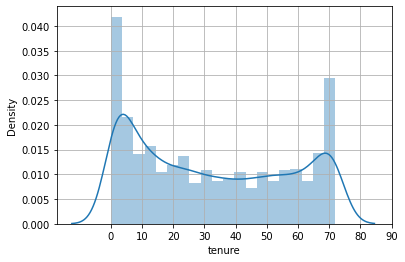

In [128]:
fig, ax = plt.subplots()
sns.distplot(df['tenure'], bins=20, ax=ax)
# ax.set_xlim(0,100)
ax.set_xticks(range(0,100,10))
ax.grid()

In [129]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [130]:
## Numeric => Binning
df['tenureCt'] = pd.cut(df['tenure'], [0, 10, 30, 65, 75], 
                        labels=['ten_0-10','ten_10-30','ten_30-65','ten_65-75'])
df['tenureCt']

0        ten_0-10
1       ten_30-65
2        ten_0-10
3       ten_30-65
4        ten_0-10
          ...    
7038    ten_10-30
7039    ten_65-75
7040    ten_10-30
7041     ten_0-10
7042    ten_65-75
Name: tenureCt, Length: 7043, dtype: category
Categories (4, object): ['ten_0-10' < 'ten_10-30' < 'ten_30-65' < 'ten_65-75']

In [131]:
## Bins => One Hot Encoding
one_hot_encoded_data = pd.get_dummies(df['tenureCt'])
df2 = pd.concat([df2, one_hot_encoded_data], axis=1)
df2

,gender,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ten_0-10,ten_10-30,ten_30-65,ten_65-75
0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
7039,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
7040,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
7041,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0


In [132]:
df2['Partner'] = df['Partner'].apply(lambda x: 1 if x== 'Yes' else 0)
df2['Dependents'] = df['Dependents'].apply(lambda x: 1 if x== 'Yes' else 0)
df2['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x== 'Yes' else 0)
df2['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x== 'Yes' else 0)

df2['Churn'] = df['Churn'].apply(lambda x: 1 if x== 'Yes' else 0)

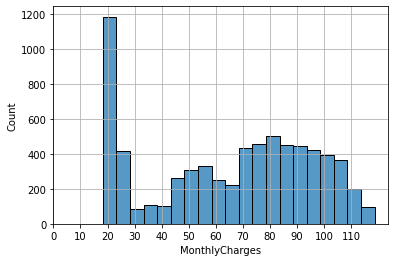

In [68]:
fig, ax = plt.subplots()
sns.histplot(df['MonthlyCharges'], bins=20, ax=ax)
# ax.set_xlim(0,100)
ax.set_xticks(range(0,120,10))
ax.grid()

In [71]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [85]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

The 'TotalCharges' variable is not a string, its an object. It has to be changes to numeric to be processed. 

In [133]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce' )  ## errors='coerce' will transform the non-numeric values into NaN
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

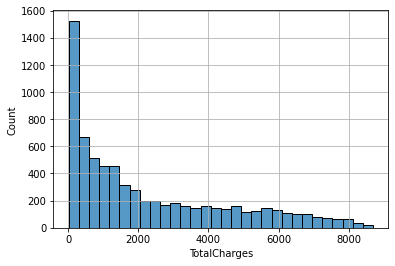

In [96]:
fig, ax = plt.subplots()
sns.histplot(df['TotalCharges'], bins=30, ax=ax)
# ax.set_xlim(0,100)
# ax.set_xticks(range(0,9000,100))
ax.grid()

In [134]:
## Numeric => Binning to 4 quantiles
df['TotalChargesQt'] = pd.cut(df['tenure'], 4, 
                        labels=['Tot_Charg_Q1','Tot_Charg_Q2','Tot_Charg_Q3','Tot_Charg_Q4'])
df['TotalChargesQt']

0       Tot_Charg_Q1
1       Tot_Charg_Q2
2       Tot_Charg_Q1
3       Tot_Charg_Q3
4       Tot_Charg_Q1
            ...     
7038    Tot_Charg_Q2
7039    Tot_Charg_Q4
7040    Tot_Charg_Q1
7041    Tot_Charg_Q1
7042    Tot_Charg_Q4
Name: TotalChargesQt, Length: 7043, dtype: category
Categories (4, object): ['Tot_Charg_Q1' < 'Tot_Charg_Q2' < 'Tot_Charg_Q3' < 'Tot_Charg_Q4']

In [135]:
## Quantile Bins => One Hot Encoding
one_hot_encoded_data = pd.get_dummies(df['TotalChargesQt'])
df2 = pd.concat([df2, one_hot_encoded_data], axis=1)
df2

,gender,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ten_0-10,ten_10-30,ten_30-65,ten_65-75,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Tot_Charg_Q1,Tot_Charg_Q2,Tot_Charg_Q3,Tot_Charg_Q4
0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0
3,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0
7039,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1
7040,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0
7041,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,1,0,0,0


In [137]:
df2['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Final step of Data Preparation. 
Split Train, Test data sest 

In [151]:
from sklearn.model_selection import train_test_split

y=df2['Churn']
print(y.shape)

X=df2.drop(['Churn'], axis=1)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=41)

(7043,)
(7043, 44)


# Prediction

There are many algorithms can be used to predict this problem. Including Logistic Regression, Random Forest, XGBoost and we have enough data we can utilize Neural Network as well. 

Here Random Forest has been applied.

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)
print(accuracy_score(y_test,prediction))

0.7682119205298014


With Confusion Matrix we have better understanding of model performance 

Performance in Training


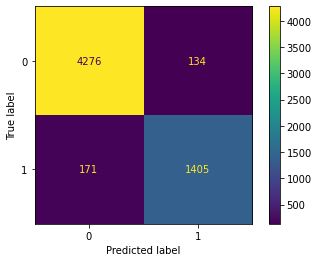

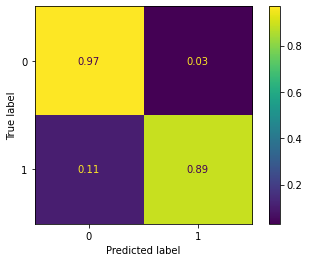

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Performance in Training")
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, normalize='true')

Testing Accuracy


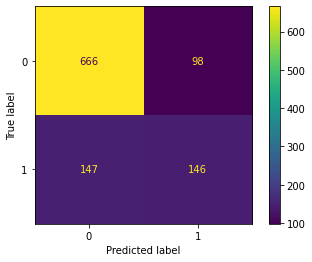

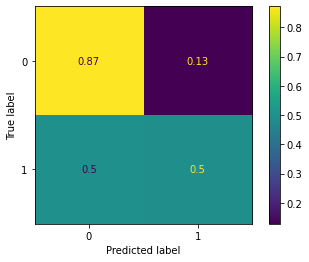

In [161]:
print("Testing Accuracy")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true')

To get better result we try to improve the model by tuning the hyper-parameters of Random Forest 

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf_random=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1000,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=21)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

random_cv=RandomizedSearchCV(rf_random,param_grid,cv=5,verbose=0,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

0.8022705771050141


Performance in Training


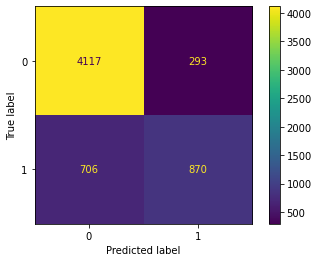

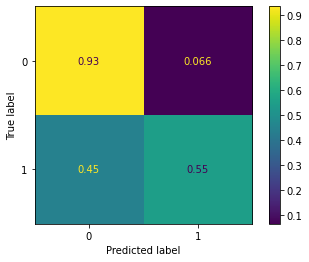

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Performance in Training")
ConfusionMatrixDisplay.from_estimator(best_random, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(best_random, X_train, y_train, normalize='true')

Testing Accuracy


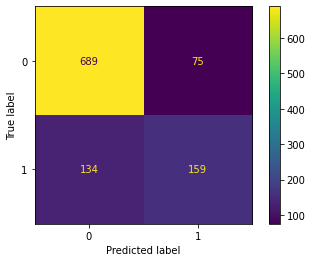

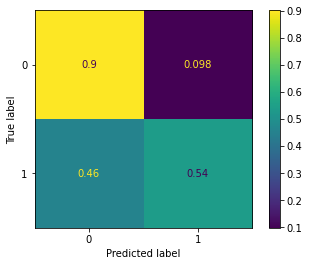

In [164]:
print("Testing Accuracy")
ConfusionMatrixDisplay.from_estimator(best_random, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(best_random, X_test, y_test, normalize='true')

We can see by hyper tuning the model the accuracy increased around 4%. Specifically the first model had 50% accuracy in predicting Churn, while by hypertuning the parameters, accuracy rised to 54%

In [165]:
df2['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can see the due to bias in data, the model accuracy can be improved by doing more freature engineering or applying different ML models. 